# In this notebook, we run an MLP model on dataset hoda and examine the results in terms of underfitting, fitting and overfitting.

## Download dataset

In [10]:
!gdown --fuzzy https://drive.google.com/file/d/1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1QJrQsEYOfPBn1LoIeYMZ2HFBRC0AY-6F
To: /content/dataset.py
100% 909/909 [00:00<00:00, 3.85MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zStcaVl_34RrYIfVObuM4xzB6s8xwvBi
To: /content/Data_hoda_full.mat
100% 3.99M/3.99M [00:00<00:00, 77.8MB/s]


## Importing libraries

In [11]:
import keras
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense,  Activation
from dataset import load_hoda

# Load dataset

In [12]:
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda()

### Converting x_train and x_test to ndarray array format and converting y_train and y_test to one-hot-encoding:
####First, we have defined a simple function that prints the dimensions, data type and information of the loaded dataset. We will print this information before and after data preprocessing to notice the changes!

In [13]:
# Preprocess input data for Keras.
x_train = np.array(x_train_original)
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test_original)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)

In [14]:
def print_data_info(x_train, y_train, x_test, y_test):
    #Check data Type
    print ("\ttype(x_train): {}".format(type(x_train)))
    print ("\ttype(y_train): {}".format(type(y_train)))

    #check data Shape
    print ("\tx_train.shape: {}".format(np.shape(x_train)))
    print ("\ty_train.shape: {}".format(np.shape(y_train)))
    print ("\tx_test.shape: {}".format(np.shape(x_test)))
    print ("\ty_test.shape: {}".format(np.shape(y_test)))

    #sample data
    print ("\ty_train[0]: {}".format(y_train[0]))

In [15]:
print("Before Preprocessing:")
print_data_info(x_train_original, y_train_original, x_test_original, y_test_original)
print("After Preprocessing:")
print_data_info(x_train, y_train, x_test, y_test)

Before Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000,)
	x_test.shape: (200, 25)
	y_test.shape: (200,)
	y_train[0]: 6
After Preprocessing:
	type(x_train): <class 'numpy.ndarray'>
	type(y_train): <class 'numpy.ndarray'>
	x_train.shape: (1000, 25)
	y_train.shape: (1000, 10)
	x_test.shape: (200, 25)
	y_test.shape: (200, 10)
	y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [17]:
# In this Create the model, input dim=25 and output dim = 10

##################################
# you code here
##################################
model = Sequential()

model.add(Dense(units=64, input_dim=25, activation='relu'))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1664      
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 6474 (25.29 KB)
Trainable params: 6474 (25.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile model

In [19]:
# In this cell compile mode, set loss function and optimizer and get metrics accuracy

##################################
# you code here
##################################
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Fit model

In [20]:
MLP_model = model.fit(x_train, y_train,
          epochs=100,
          batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
16/16 [==============================] - 1s 23ms/step - loss: 2.1361 - accuracy: 0.2480 - val_loss: 2.0181 - val_accuracy: 0.4000
Epoch 2/100
16/16 [==============================] - 0s 6ms/step - loss: 1.8317 - accuracy: 0.5460 - val_loss: 1.7092 - val_accuracy: 0.6300
Epoch 3/100
16/16 [==============================] - 0s 8ms/step - loss: 1.4938 - accuracy: 0.6790 - val_loss: 1.3620 - val_accuracy: 0.7100
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 1.1610 - accuracy: 0.7550 - val_loss: 1.0454 - val_accuracy: 0.7750
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.8883 - accuracy: 0.8050 - val_loss: 0.8250 - val_accuracy: 0.8100
Epoch 6/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7109 - accuracy: 0.8330 - val_loss: 0.6813 - val_accuracy: 0.8150
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.5948 - accuracy: 0.8470 - val_loss: 0.5845 - val_accuracy: 0.8400
Epoch 8/100


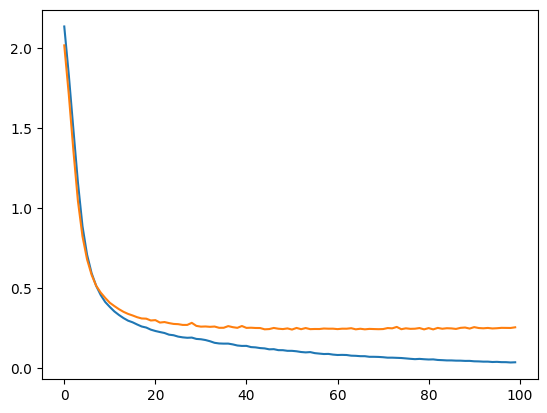

In [21]:
# plot Loss
plt.plot(MLP_model.history["loss"])
plt.plot(MLP_model.history["val_loss"])

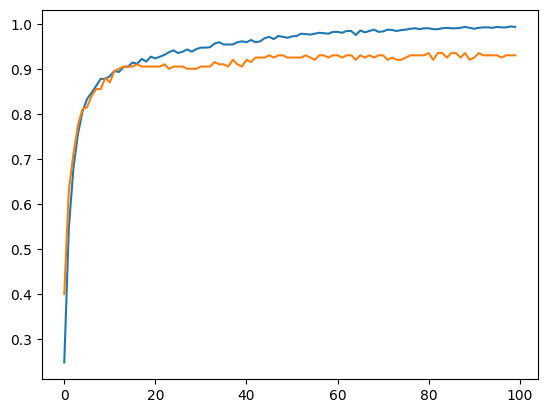

In [22]:
# plot accuracy
plt.plot(MLP_model.history["accuracy"])
plt.plot(MLP_model.history["val_accuracy"])